In [26]:
pip install pandas matplotlib seaborn

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('credit_card.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


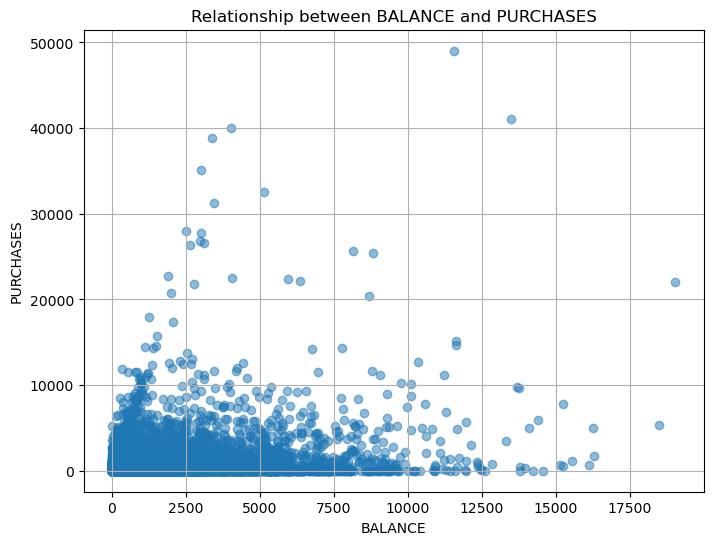

In [29]:
def generate_relational_graph(data, x_attribute, y_attribute):
    """
    Generate an xy scatter plot to visualize the relationship between two numerical attributes.

    Parameters:
    - data (DataFrame): The DataFrame containing the dataset.
    - x_attribute (str): The name of the attribute to be plotted on the x-axis.
    - y_attribute (str): The name of the attribute to be plotted on the y-axis.

    Returns:
    - None
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_attribute], data[y_attribute], alpha=0.5)
    plt.title(f'Relationship between {x_attribute} and {y_attribute}')
    plt.xlabel(x_attribute)
    plt.ylabel(y_attribute)
    plt.grid(True)
    plt.show()

# Function calling line
generate_relational_graph(data, 'BALANCE', 'PURCHASES')


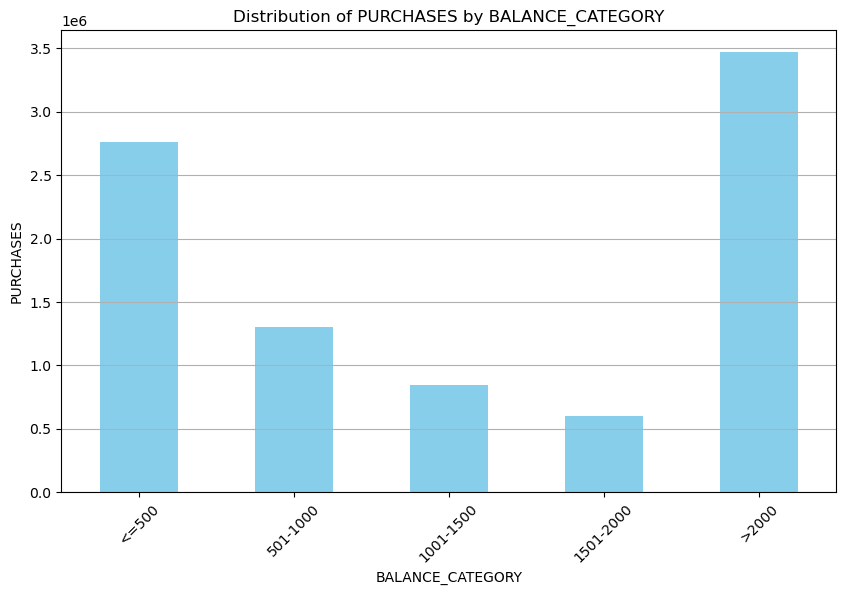

In [30]:
# Create bins for balance
bins = [-float('inf'), 500, 1000, 1500, 2000, float('inf')]
labels = ['<=500', '501-1000', '1001-1500', '1501-2000', '>2000']
data['BALANCE_CATEGORY'] = pd.cut(data['BALANCE'], bins=bins, labels=labels)

def generate_categorical_graph(data, category_attribute, numerical_attribute):
    """
    Generate a bar chart to compare the distribution of a numerical attribute across different categories.

    Parameters:
    - data (DataFrame): The DataFrame containing the dataset.
    - category_attribute (str): The name of the categorical attribute used for grouping.
    - numerical_attribute (str): The name of the numerical attribute to be plotted.

    Returns:
    - None
    """
    # Group by category attribute and sum the numerical attribute
    grouped_data = data.groupby(category_attribute)[numerical_attribute].sum()

    # Plotting the categorical graph (bar chart)
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {numerical_attribute} by {category_attribute}')
    plt.xlabel(category_attribute)
    plt.ylabel(numerical_attribute)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Function calling line
generate_categorical_graph(data, 'BALANCE_CATEGORY', 'PURCHASES')


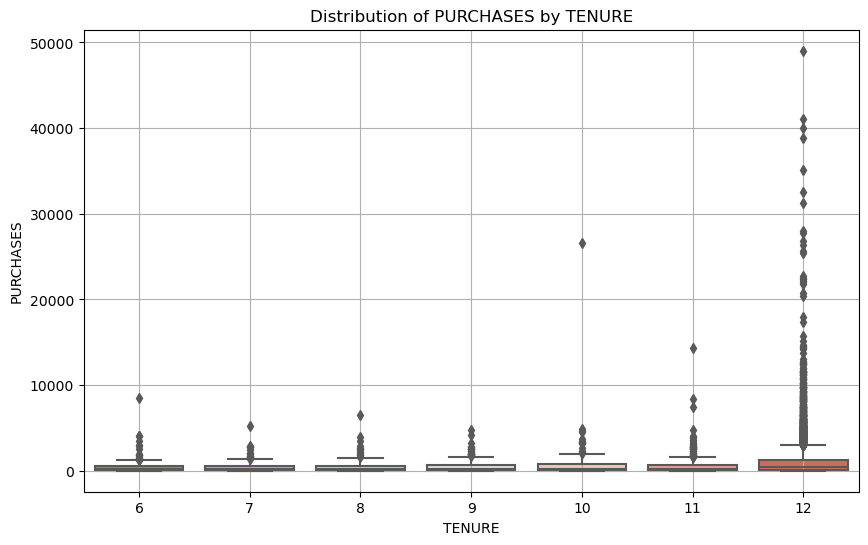

In [31]:
def generate_statistical_graph(data, category_attribute, numerical_attribute):
    """
    Generate a box plot to visualize the distribution of a numerical attribute across different categories.

    Parameters:
    - data (DataFrame): The DataFrame containing the dataset.
    - category_attribute (str): The name of the categorical attribute used for grouping.
    - numerical_attribute (str): The name of the numerical attribute to be plotted.

    Returns:
    - None
    """
    # Plotting the statistical graph (box plot)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=category_attribute, y=numerical_attribute, data=data, palette='coolwarm')
    plt.title(f'Distribution of {numerical_attribute} by {category_attribute}')
    plt.xlabel(category_attribute)
    plt.ylabel(numerical_attribute)
    plt.grid(True)
    plt.show()

# Function calling line
generate_statistical_graph(data, 'TENURE', 'PURCHASES')


In [32]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Statistical Analysis
statistical_analysis = numeric_data.describe()

# Calculate skewness and kurtosis
skewness = numeric_data.skew()
kurtosis = numeric_data.kurtosis()

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Print statistical analysis
print("Statistical Analysis:")
print(statistical_analysis)

# Print skewness
print("\nSkewness:")
print(skewness)

# Print kurtosis
print("\nKurtosis:")
print(kurtosis)

# Print correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Statistical Analysis:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.00

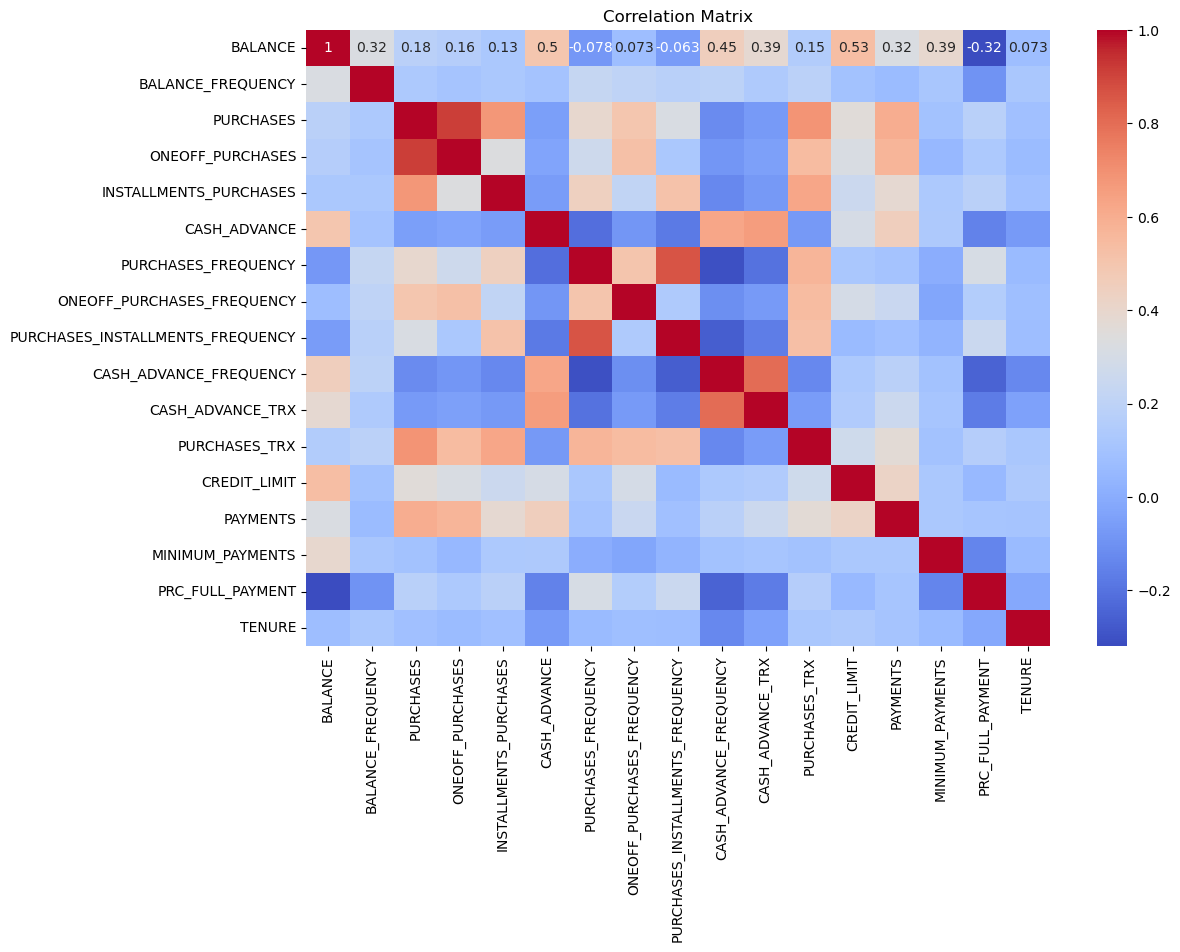

In [44]:
def plot_correlation_matrix(data, numerical_cols):
    """
    Creates a heatmap showing correlations between numerical features in data.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Replace 'numerical_cols' with the numerical columns from your own dataset
numerical_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
                  'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
                  'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
                  'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
                  'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plot_correlation_matrix(data, numerical_cols)


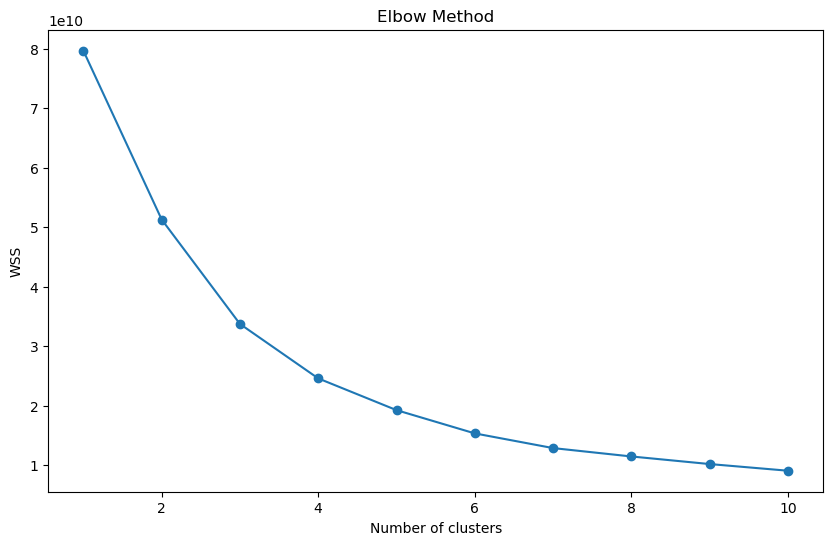

In [34]:
def calculate_elbow_method(data):
    """
    Calculate Within-Cluster-Sum of Squared Errors (WSS) for different values of k
    and plot elbow graph to help with selecting number of clusters.
    """
    wss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS')
    plt.show()
    return wss

wss = calculate_elbow_method(data[['BALANCE', 'PURCHASES']])




In [35]:
def calculate_silhouette_scores(data):
    """
    Calculate silhouette scores for different values of k to help with selecting number of clusters.
    """
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
        print(f'Silhouette Score for {i} clusters: {score}')
    return silhouette_scores
    
silhouette_scores = calculate_silhouette_scores(data[['BALANCE', 'PURCHASES']])


Silhouette Score for 2 clusters: 0.6456577525250198
Silhouette Score for 3 clusters: 0.6282409065765153
Silhouette Score for 4 clusters: 0.6354344686329888
Silhouette Score for 5 clusters: 0.5033523001803966
Silhouette Score for 6 clusters: 0.5177391273643118
Silhouette Score for 7 clusters: 0.46680400621949075
Silhouette Score for 8 clusters: 0.46868398201900136
Silhouette Score for 9 clusters: 0.4641554399922518
Silhouette Score for 10 clusters: 0.4622259271696299


In [36]:
def perform_kmeans(data, n_clusters=5):
    """
    Performs K-Means clustering on data.

    Parameters:
    - data (DataFrame): The DataFrame containing the dataset.
    - n_clusters (int): The number of clusters to form.

    Returns:
    - kmeans (KMeans): The fitted KMeans model.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    data['Cluster'] = cluster_labels
    print("Cluster column added successfully.")
    return kmeans


In [37]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']] = imputer.fit_transform(data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']])


In [38]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
BALANCE_CATEGORY                    0
dtype: int64

In [39]:
print(data.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [40]:
def plot_clusters(data):
    """
    Plots data points with different colors for each cluster.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data['BALANCE'], data['PURCHASES'], c=data['Cluster'], cmap='viridis')
    plt.title('Customer Segments Based on Balance and Purchases')
    plt.xlabel('Balance')
    plt.ylabel('Purchases')
    plt.colorbar(label='Cluster')
    plt.show()

In [42]:
def perform_kmeans(data, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['BALANCE', 'PURCHASES']])
    return kmeans

Data after clustering:
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1           

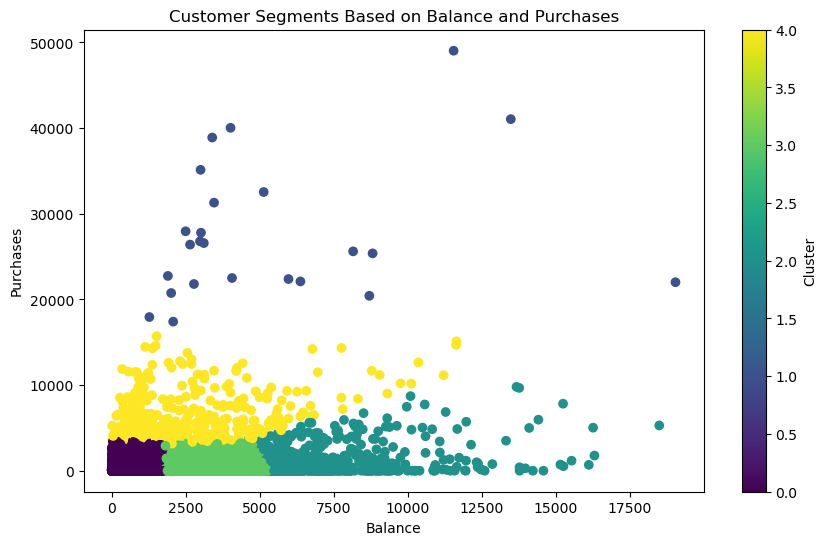

In [43]:
# Perform KMeans clustering
kmeans_model = perform_kmeans(data, 5)

# Print the data after clustering to verify the 'Cluster' column
print("Data after clustering:\n", data.head())

# Check for missing values in the data
print("Missing values in the data:\n", data.isnull().sum())

# Plot the clusters
plot_clusters(data)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def perform_linear_fitting(data):
    
    reg = LinearRegression()
    X = data[['BALANCE']].values.reshape(-1, 1)
    y = data['PURCHASES'].values
    reg.fit(X, y)
    
    # Make predictions using the model
    y_pred = reg.predict(X)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    # Return the model and the metrics
    return reg, mae, mse, rmse, r2

# Perform linear regression fitting
reg_model, mae, mse, rmse, r2 = perform_linear_fitting(data)


In [49]:
# Function for Descriptive Statistics
def generate_descriptive_statistics(data):
    """
    Generates descriptive statistics for dataset, including measures of central tendency,
    dispersion and shape of the dataset’s distribution.
    """
    desc_stats = data.describe()
    additional_stats = pd.DataFrame({
        'skewness': data.skew(),
        'kurtosis': data.kurt()
    }).transpose()
    return pd.concat([desc_stats, additional_stats], axis=0)


In [50]:
# Function to print and return descriptive statistics and correlation matrix
def descriptive_statistics_and_correlation(data):
    """
    Prints and returns descriptive statistics and correlation matrix of data.
    """
    descriptive_stats = generate_descriptive_statistics(data)
    correlation_matrix = data.corr()
    
    print("\nDescriptive Statistics:")
    print(descriptive_stats)
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    
    return descriptive_stats, correlation_matrix

descriptive_stats, correlation_matrix = descriptive_statistics_and_correlation(data[numerical_cols])


Descriptive Statistics:
               BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count      8950.000000        8950.000000   8950.000000       8950.000000   
mean       1564.474828           0.877271   1003.204834        592.437371   
std        2081.531879           0.236904   2136.634782       1659.887917   
min           0.000000           0.000000      0.000000          0.000000   
25%         128.281915           0.888889     39.635000          0.000000   
50%         873.385231           1.000000    361.280000         38.000000   
75%        2054.140036           1.000000   1110.130000        577.405000   
max       19043.138560           1.000000  49039.570000      40761.250000   
skewness      2.393386          -2.023266      8.144269         10.045083   
kurtosis      7.674751           3.092370    111.388771        164.187572   

          INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                8950.000000   8950.000000          

In [51]:
model, mae, mse, rmse, r2 = perform_linear_fitting(data)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 1068.87
Mean Squared Error (MSE): 4414722.87
Root Mean Squared Error (RMSE): 2101.12
R-squared (R²): 0.03


In [52]:
reg_model, mae, mse, rmse, r2 = perform_linear_fitting(data)

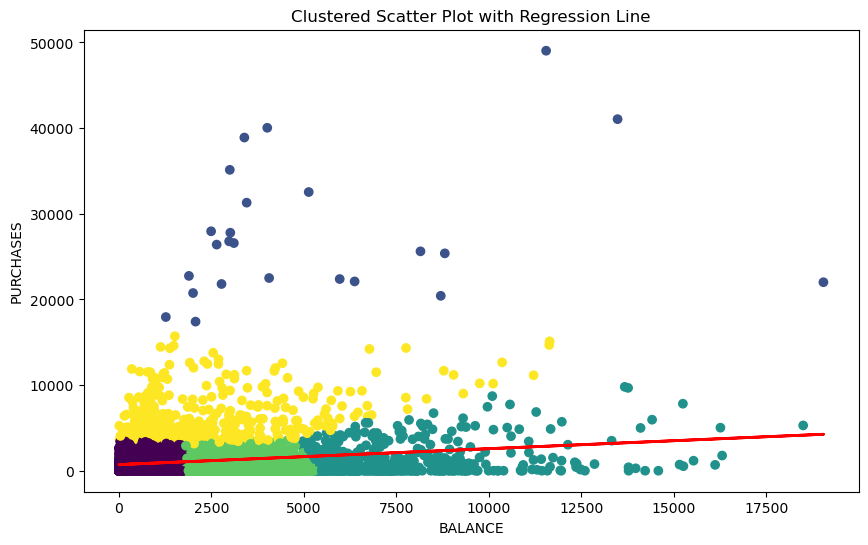

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(data['BALANCE'], data['PURCHASES'], c=data['Cluster'], cmap='viridis')
plt.plot(data['BALANCE'], reg_model.predict(data[['BALANCE']].values), color='red', linewidth=2)
plt.title('Clustered Scatter Plot with Regression Line')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()
